In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import  matplotlib.pyplot as plt 
from sklearn import tree

titanic_df = pd.read_csv('titanic.csv')

In [71]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
# Drop unnecessary columns
columns_to_drop = ["Cabin", "PassengerId", "Name", "Ticket"]
titanic_df.drop(columns_to_drop, axis=1, inplace=True)

# Display the modified DataFrame
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [74]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

Now, we do the same to the "Embarked" column.

In [75]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,False,False,True
1,1,1,female,38.0,1,0,71.2833,True,False,False
2,1,3,female,26.0,0,0,7.9250,False,False,True
3,1,1,female,35.0,1,0,53.1000,False,False,True
4,0,3,male,35.0,0,0,8.0500,False,False,True


In [61]:

# Convert "Sex" to numerical
titanic_df["Sex"] = titanic_df["Sex"].map({"male": 0, "female": 1})

# Fill missing values in the "Age" column
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())

# Split the data into independent variables (X) and the target variable (y)
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]



In [62]:

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split into training and development
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


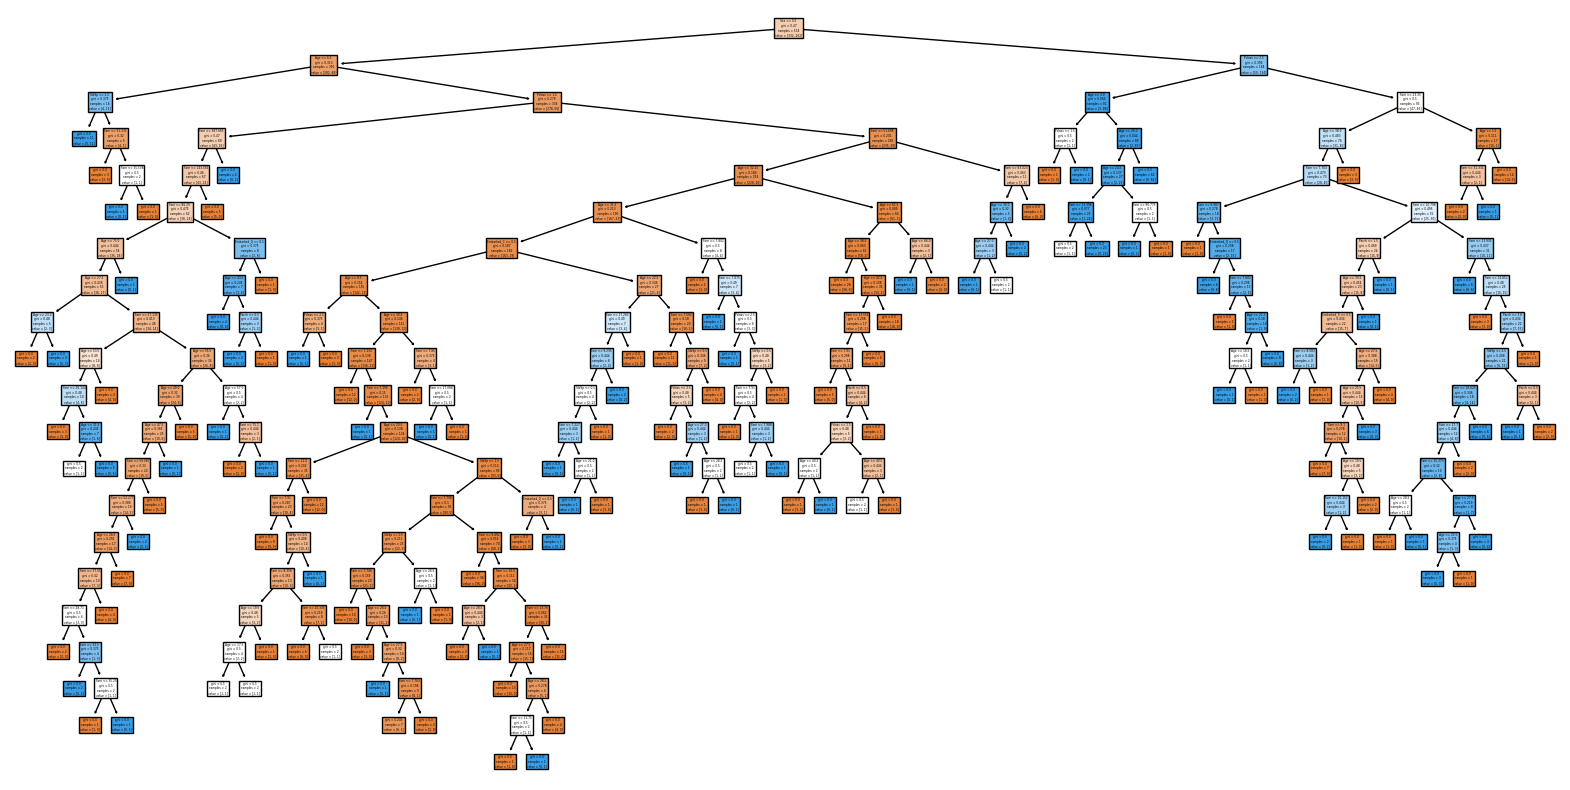

In [64]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


# Plot the decision tree
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns.tolist(), filled=True)
plt.show()


In [65]:
# Evaluate on the development set
y_dev_pred = clf.predict(X_dev)
accuracy_dev = accuracy_score(y_dev, y_dev_pred)
print('Development Accuracy:', accuracy_dev)

Development Accuracy: 0.8146067415730337


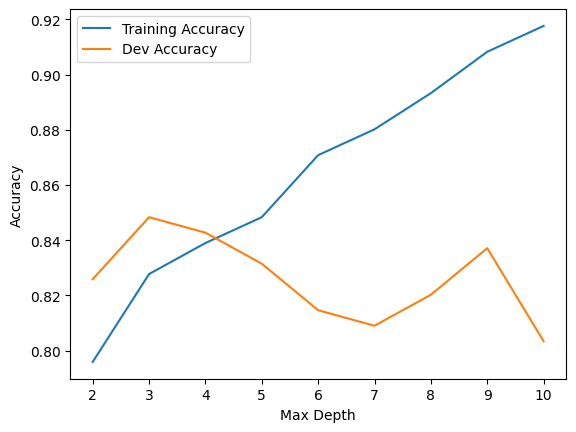

In [66]:
# Train and evaluate decision trees with different max depths
train_accuracies = []
dev_accuracies = []


for max_depth in range(2, 11):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_dev_pred = clf.predict(X_dev)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)

    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)

# Plot the training and development accuracies for different max depths
plt.plot(range(2, 11), train_accuracies, label='Training Accuracy')
plt.plot(range(2, 11), dev_accuracies, label='Dev Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


    



          


Test Accuracy:

Increases: This is a positive sign, as it indicates that the model is performing better on new, unseen data. It's the ultimate goal to have a model that generalizes well to different datasets.

Development Set Accuracy (Dev):

Decreases: This suggests that  the model might be becoming too complex, capturing noise or patterns specific to the development set that do not generalize well to new data.

In [67]:
# Find the optimal max depth
optimal_max_depth = 4

# Train a decision tree with the optimal max depth
clf = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
clf.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.8100558659217877


The test accuracy of 0.8101 means that the  decision tree model correctly predicted the survival status of the passengers in the test dataset approximately 81.01% of the time. In other words:

Accuracy: 81.01%
Misclassification Rate: 18.99%